<a href="https://colab.research.google.com/github/rinazbelhaj/EVA/blob/master/Project%209/Assignment%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Functions

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

# Data download and custom functions

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

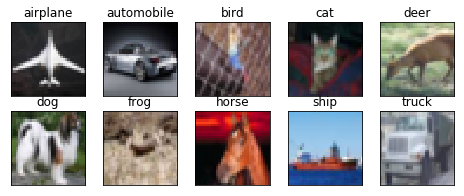

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
test_class = test_labels
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Modified Network - Assignment 6A

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

# Define the model
model = Sequential()

# Jump - 1
model.add(Conv2D(32,  (3, 3), activation='relu',padding='same',input_shape=(32,32,3), name='conv_1')) # RF - 3
model.add(Conv2D(64,  (3, 3), activation='relu',padding='same', name='conv_2')) # RF - 5
model.add(Conv2D(128, (3, 3), activation='relu',padding='same', name='conv_3')) # RF - 7
model.add(Conv2D(32,  (1, 1), activation='relu',padding='same', name='conv_4')) # RF - 7
model.add(MaxPooling2D(pool_size=(2, 2), name='pool_1')) # RF - 8
model.add(Dropout(0.10,name='dropout_1')) # RF - 8

# Jump - 2
model.add(Conv2D(32,  (3, 3), activation='relu',padding='same', name='conv_5')) # RF - 12
model.add(Conv2D(64,  (3, 3), activation='relu',padding='same', name='conv_6')) # RF - 16
model.add(Conv2D(128, (3, 3), activation='relu',padding='same', name='conv_7')) # RF - 20
model.add(Conv2D(32,  (1, 1), activation='relu',padding='same', name='conv_8')) # RF - 20
model.add(MaxPooling2D(pool_size=(2, 2), name='pool_2')) # RF - 22
model.add(Dropout(0.10,name='dropout_2')) # RF - 22

# Jump - 4
model.add(Conv2D(32,  (3, 3), activation='relu',padding='same', name='conv_9'))  # RF - 30
model.add(Conv2D(64,  (3, 3), activation='relu',padding='same', name='conv_10')) # RF - 38
model.add(Conv2D(128, (3, 3), activation='relu',padding='same', name='conv_11')) # RF - 46
model.add(Conv2D(32,  (1, 1), activation='relu',padding='same', name='conv_12')) # RF - 46

model.add(Conv2D(64,  (3, 3), activation='relu',padding='valid', name='conv_13')) # RF - 54
model.add(Conv2D(128, (3, 3), activation='relu',padding='valid', name='conv_14')) # RF - 62
model.add(Conv2D(10,  (4, 4), activation= None ,padding='valid', name='conv_15')) # RF - 74
model.add(Flatten(name="flatten"))
model.add(Activation('softmax', name='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv_2 (Conv2D)              (None, 32, 32, 64)        18496     
_________________________________________________________________
conv_3 (Conv2D)              (None, 32, 32, 128)       73856     
_________________________________________________________________
conv_4 (Conv2D)              (None, 32, 32, 32)        4128      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv_5 (Conv2D)              (None, 16, 16, 32)        9248      
__________

# GradCam Function

In [0]:
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2



def gradCam(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  pred_val = model.predict(x, batch_size=None, verbose=0, steps=None)
  class_idx = np.argmax(pred_val[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv_13")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  pooled_grads
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(last_conv_layer.filters):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  heatmap = heatmap.astype(dtype=np.float32)/255

  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

  return superimposed_img

# 1) Model Training - Without Cut Out

Epoch 1/20
195/195 [==============================] - 15s 79ms/step - loss: 2.0347 - acc: 0.2360 - val_loss: 1.6726 - val_acc: 0.3822
Epoch 2/20
195/195 [==============================] - 13s 69ms/step - loss: 1.5282 - acc: 0.4385 - val_loss: 1.3482 - val_acc: 0.4992
Epoch 3/20
195/195 [==============================] - 14s 70ms/step - loss: 1.3014 - acc: 0.5266 - val_loss: 1.2995 - val_acc: 0.5370
Epoch 4/20
195/195 [==============================] - 14s 70ms/step - loss: 1.1540 - acc: 0.5861 - val_loss: 1.1070 - val_acc: 0.6029
Epoch 5/20
195/195 [==============================] - 14s 71ms/step - loss: 1.0300 - acc: 0.6320 - val_loss: 1.0892 - val_acc: 0.6155
Epoch 6/20
195/195 [==============================] - 14s 72ms/step - loss: 0.9556 - acc: 0.6582 - val_loss: 0.9335 - val_acc: 0.6667
Epoch 7/20
195/195 [==============================] - 14s 72ms/step - loss: 0.8682 - acc: 0.6893 - val_loss: 0.8859 - val_acc: 0.6859
Epoch 8/20
195/195 [==============================] - 14s 72ms

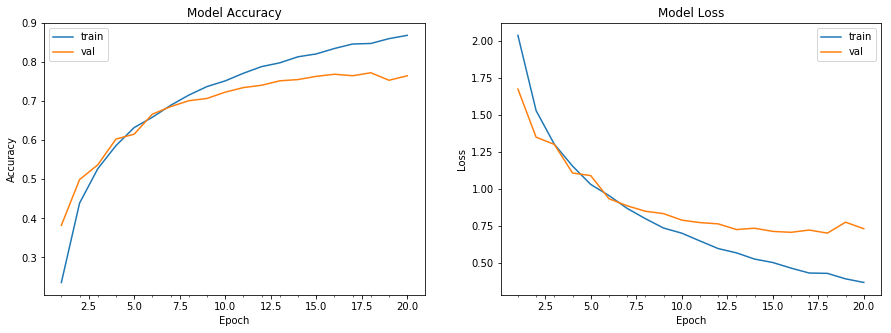

Accuracy on test data is: 76.49


In [0]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 256

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = batch_size),
                                 steps_per_epoch = train_features.shape[0]//batch_size, epochs = 20, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Misclassified Images

Misclassified Image Index :  [20, 25, 32, 33, 35, 47, 52, 57, 58, 59, 64, 70, 71, 76, 78, 85, 86]


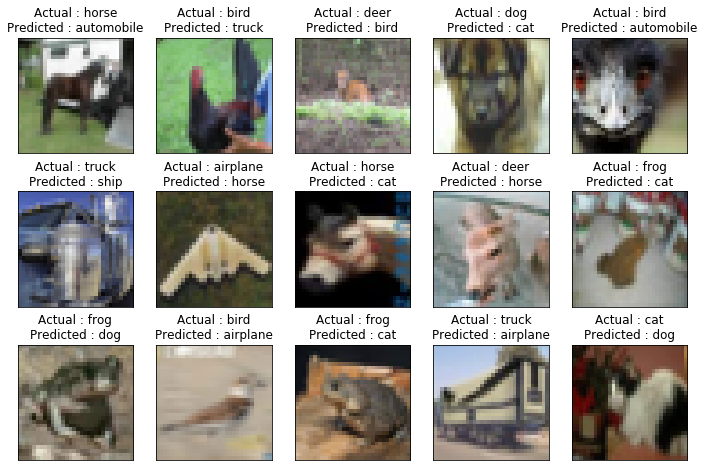

In [0]:
pred_val = model.predict(test_features, batch_size=None, verbose=0, steps=None)
pred_class = np.argmax(pred_val,axis=1)

l = []
for i in range(100):
  if pred_class[i]!=test_class[i][0]:
    l.append(i)

print("Misclassified Image Index : ",l)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(12,8))
k = 0
for i in l[:15]:
    ax = fig.add_subplot(3, 5, 1 + k, xticks=[], yticks=[])
    im = test_features[i]
    ax.set_title("Actual : "+class_names[test_class[i][0]]+"\nPredicted : "+class_names[pred_class[i]])
    plt.imshow(im)
    k = k+1
plt.show()

##  GradCam on Misclassified Images

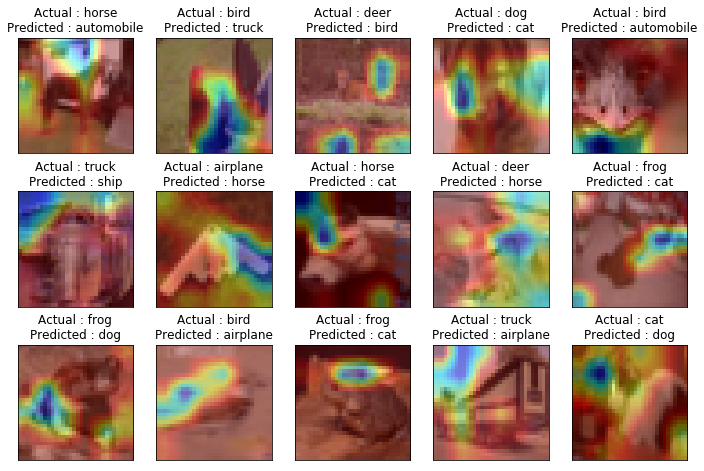

In [0]:
pred_val = model.predict(test_features, batch_size=None, verbose=0, steps=None)
pred_class = np.argmax(pred_val,axis=1)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(12,8))
k = 0
for i in l[:15]:
    ax = fig.add_subplot(3, 5, 1 + k, xticks=[], yticks=[])
    im = test_features[i]
    ax.set_title("Actual : "+class_names[test_class[i][0]]+"\nPredicted : "+class_names[pred_class[i]])
    plt.imshow(gradCam(im))
    k = k+1
plt.show()

# Cut Out Function

In [0]:
import numpy as np


def get_random_eraser(p=0.7, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

## Cutout Sample

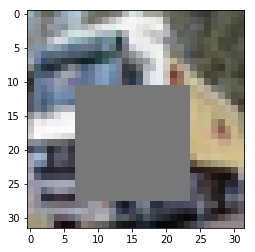

In [0]:
mean_pixel = np.mean(train_features)

eraser = get_random_eraser(s_l=0.3, s_h=0.3, r_1=1, r_2=1,v_l=mean_pixel, v_h=mean_pixel)

# load image to img
plt.imshow(eraser(train_features[1]))

# 2) Model Training - With Cut Out

## Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

# Define the model
model = Sequential()

# Jump - 1
model.add(Conv2D(32,  (3, 3), activation='relu',padding='same',input_shape=(32,32,3), name='conv_1')) # RF - 3
model.add(Conv2D(64,  (3, 3), activation='relu',padding='same', name='conv_2')) # RF - 5
model.add(Conv2D(128, (3, 3), activation='relu',padding='same', name='conv_3')) # RF - 7
model.add(Conv2D(32,  (1, 1), activation='relu',padding='same', name='conv_4')) # RF - 7
model.add(MaxPooling2D(pool_size=(2, 2), name='pool_1')) # RF - 8
model.add(Dropout(0.10,name='dropout_1')) # RF - 8

# Jump - 2
model.add(Conv2D(32,  (3, 3), activation='relu',padding='same', name='conv_5')) # RF - 12
model.add(Conv2D(64,  (3, 3), activation='relu',padding='same', name='conv_6')) # RF - 16
model.add(Conv2D(128, (3, 3), activation='relu',padding='same', name='conv_7')) # RF - 20
model.add(Conv2D(32,  (1, 1), activation='relu',padding='same', name='conv_8')) # RF - 20
model.add(MaxPooling2D(pool_size=(2, 2), name='pool_2')) # RF - 22
model.add(Dropout(0.10,name='dropout_2')) # RF - 22

# Jump - 4
model.add(Conv2D(32,  (3, 3), activation='relu',padding='same', name='conv_9'))  # RF - 30
model.add(Conv2D(64,  (3, 3), activation='relu',padding='same', name='conv_10')) # RF - 38
model.add(Conv2D(128, (3, 3), activation='relu',padding='same', name='conv_11')) # RF - 46
model.add(Conv2D(32,  (1, 1), activation='relu',padding='same', name='conv_12')) # RF - 46

model.add(Conv2D(64,  (3, 3), activation='relu',padding='valid', name='conv_13')) # RF - 54
model.add(Conv2D(128, (3, 3), activation='relu',padding='valid', name='conv_14')) # RF - 62
model.add(Conv2D(10,  (4, 4), activation= None ,padding='valid', name='conv_15')) # RF - 74
model.add(Flatten(name="flatten"))
model.add(Activation('softmax', name='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Training

Epoch 1/20
195/195 [==============================] - 18s 90ms/step - loss: 2.0062 - acc: 0.2482 - val_loss: 1.6568 - val_acc: 0.3783
Epoch 2/20
195/195 [==============================] - 14s 70ms/step - loss: 1.6515 - acc: 0.3836 - val_loss: 1.4372 - val_acc: 0.4744
Epoch 3/20
195/195 [==============================] - 14s 70ms/step - loss: 1.4916 - acc: 0.4475 - val_loss: 1.3487 - val_acc: 0.5097
Epoch 4/20
195/195 [==============================] - 14s 71ms/step - loss: 1.3889 - acc: 0.4898 - val_loss: 1.2092 - val_acc: 0.5646
Epoch 5/20
195/195 [==============================] - 14s 72ms/step - loss: 1.2864 - acc: 0.5317 - val_loss: 1.1015 - val_acc: 0.6056
Epoch 6/20
195/195 [==============================] - 14s 72ms/step - loss: 1.2027 - acc: 0.5650 - val_loss: 1.1319 - val_acc: 0.6093
Epoch 7/20
195/195 [==============================] - 14s 73ms/step - loss: 1.1397 - acc: 0.5893 - val_loss: 0.9928 - val_acc: 0.6404
Epoch 8/20
195/195 [==============================] - 14s 73ms

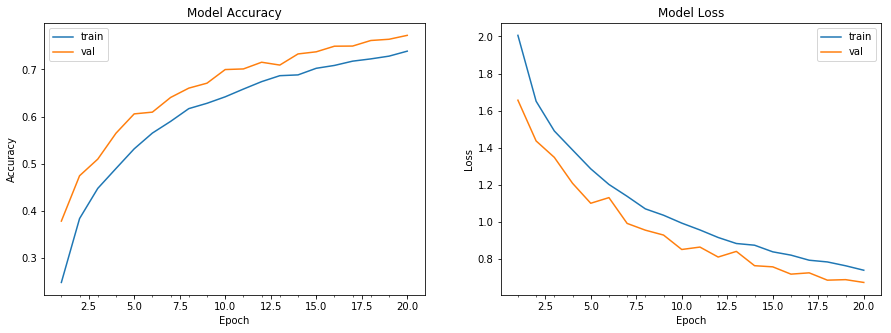

Accuracy on test data is: 77.21


In [0]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 256

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(s_l=0.3, s_h=0.3, r_1=1, r_2=1,v_l=mean_pixel, v_h=mean_pixel))


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = batch_size),
                                 steps_per_epoch = train_features.shape[0]//batch_size, epochs = 20, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

##  GradCam on Misclassified Images

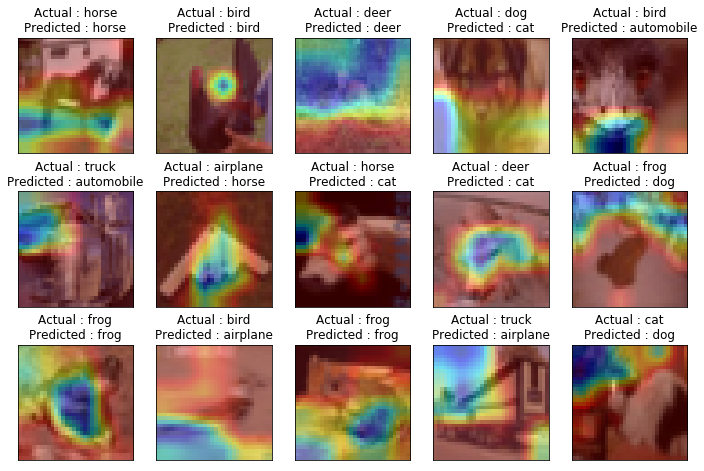

In [0]:
pred_val = model.predict(test_features, batch_size=None, verbose=0, steps=None)
pred_class = np.argmax(pred_val,axis=1)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(12,8))
k = 0
for i in l[:15]:
    ax = fig.add_subplot(3, 5, 1 + k, xticks=[], yticks=[])
    im = test_features[i]
    ax.set_title("Actual : "+class_names[test_class[i][0]]+"\nPredicted : "+class_names[pred_class[i]])
    plt.imshow(gradCam(im))
    k = k+1
plt.show()

# Result

*   The model validation accuracy increased from 76.49 to 77.21
*   5 out of 15 images in misclassified galary got correctly predicted
*   The model is now able to focus more on the object as compared to before as seen in the gradCam plots

# Inference

Cutouts are helping the model to focus more on the actual object in the image and extract more relevant features. With more epochs this model will be able to get better validation accuracy.